## <span style="color:#FF0000">H</span><span style="color:#FF8000">e</span><span style="color:#FFF000">y</span><span style="color:#FFD700"> </span><span style="color:#32CD32">t</span><span style="color:#008000">h</span><span style="color:#0000FF">e</span><span style="color:#4B0082">r</span><span style="color:#8A2BE2">e</span><span style="color:#FF00FF">!</span>

*This Notebook tests if the setup worked as intended. Everything should run without errors. If you get any errors, something is wrong with your setup. Please reach out for help in this case!*

## Test numpy & matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt

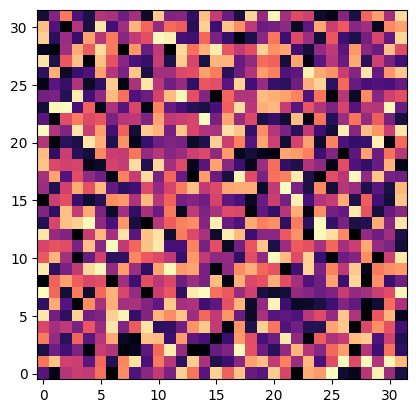

In [3]:
plt.imshow( np.random.rand( 32, 32 ), origin='lower', cmap=plt.get_cmap('magma') );

## Test MPI

In [4]:
import numpy as np
import ipcmagic
import ipyparallel as ipp

In [5]:
%ipcluster start -n 4

  0%|          | 0/4 [00:00<?, ?engine/s]

In [6]:
c = ipp.Client()

In [7]:
c.ids

[0, 1, 2, 3]

In [8]:
%%px
import socket
from mpi4py import MPI

In [9]:
%%px
print("Hello World from rank %s of %s on nid %s" % (MPI.COMM_WORLD.rank,
                                                    MPI.COMM_WORLD.size,
                                                    socket.gethostname()))

[stdout:0] Hello World from rank 2 of 4 on nid nid005098


[stdout:1] Hello World from rank 1 of 4 on nid nid005098


[stdout:3] Hello World from rank 0 of 4 on nid nid005098


[stdout:2] Hello World from rank 3 of 4 on nid nid005098


In [10]:
c.close()
%ipcluster stop

IPCluster stopped.


## Test Cupy

In [11]:
import numpy as np
import cupy as cp
import time

In [12]:
### Numpy and CPU
s = time.time()
x_cpu = np.ones((1000,1000,1000))
e = time.time()
print(e - s)

### CuPy and GPU
s = time.time()
x_gpu = cp.ones((1000,1000,1000))
cp.cuda.Stream.null.synchronize()
e = time.time()
print(e - s)

0.3296201229095459
3.2550647258758545


## Test GT4Py

In [13]:
import os
import warnings
import gt4py.next as gtx
from gt4py.next import Field

nx = 4
ny = 4
nz = 4
dtype = np.float64

backend = gtx.itir_python
# backend = gtx.gtfn_cpu
# backend = gtx.gtfn_gpu

I = gtx.Dimension("I")
J = gtx.Dimension("J")
K = gtx.Dimension("K", kind=gtx.DimensionKind.VERTICAL)

domain = gtx.domain({I: nx, J: ny, K: nz})

in_field = gtx.as_field(
    domain,
    np.fromfunction(lambda x, y, z: x**2 + y**2, shape=(nx, ny, nz)),
    dtype,
    allocator=backend,
)
out_field = gtx.zeros(domain, dtype, allocator=backend)

In [14]:
Ioff = gtx.FieldOffset("I", source=I, target=(I,))
Joff = gtx.FieldOffset("J", source=J, target=(J,))

@gtx.field_operator
def copy_operator(inp: Field[[I, J, K], dtype]) -> Field[[I, J, K], dtype]:
    return inp

@gtx.program(backend=backend)
def copy_program(inp: Field[[I, J, K], dtype], out: Field[[I, J, K], dtype]):
    copy_operator(inp, out=out)

copy_program(in_field, out_field, offset_provider={"Ioff": I, "Joff": J})

print(out_field.asnumpy)

<bound method NdArrayField.asnumpy of NumPyArrayField(_domain=Domain(dims=(Dimension(value='I', kind=<DimensionKind.HORIZONTAL: 'horizontal'>), Dimension(value='J', kind=<DimensionKind.HORIZONTAL: 'horizontal'>), Dimension(value='K', kind=<DimensionKind.VERTICAL: 'vertical'>)), ranges=(UnitRange(0, 4), UnitRange(0, 4), UnitRange(0, 4))), _ndarray=array([[[ 0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  1.],
        [ 4.,  4.,  4.,  4.],
        [ 9.,  9.,  9.,  9.]],

       [[ 1.,  1.,  1.,  1.],
        [ 2.,  2.,  2.,  2.],
        [ 5.,  5.,  5.,  5.],
        [10., 10., 10., 10.]],

       [[ 4.,  4.,  4.,  4.],
        [ 5.,  5.,  5.,  5.],
        [ 8.,  8.,  8.,  8.],
        [13., 13., 13., 13.]],

       [[ 9.,  9.,  9.,  9.],
        [10., 10., 10., 10.],
        [13., 13., 13., 13.],
        [18., 18., 18., 18.]]]))>


## Check installed packages

In [17]:
%%bash
pip list

Package                   Version
------------------------- --------------
anyio                     4.9.0
argon2-cffi               25.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.5
attrs                     25.3.0
babel                     2.17.0
bash_kernel               0.10.0
beautifulsoup4            4.13.4
black                     25.1.0
bleach                    6.2.0
boltons                   25.0.0
cached-property           2.0.1
certifi                   2025.6.15
cffi                      1.17.1
charset-normalizer        3.4.2
click                     8.2.1
cmake                     4.0.3
comm                      0.2.2
contourpy                 1.3.2
cupy-cuda12x              13.4.1
cycler                    0.12.1
cytoolz                   1.0.1
debugpy                   1.8.14
decorator                 5.2.1
deepdiff                  8.5.0
defusedxml                0.7.1
devtools     